In [1]:
# Libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

plt.rcParams['figure.figsize'] = 30, 20

In [2]:
# Data.

dataset = pd.read_csv('ClevelandDataset.csv', sep = ',', header = 0,
                  names = ['Age', 'Sex', 'ChestPainType', 'RestingBloodPreasure', 
                           'SerumCholestrol', 'FastingBloodSugar', 'RestingECG', 
                           'MaxHeartRateAchieved', 'ExerciseInducedAngine', 
                           'STDepressionInducedByRelativeToRest', 'PeakExerciseSTSegment',
                           'NumberOfMajorVesselsColoredByFlourosopy', 'Thal', 'DiagnosisOFHeartDisease'])

dataset = dataset.replace({'?':np.nan})
dataset = dataset.astype(float)
pd.set_option('display.max_rows', len(dataset))

dataset['DiagnosisOFHeartDisease'] = dataset['DiagnosisOFHeartDisease'].map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})

# Feature list.

# Sex. 1 = male, 0 = female.
# Cheast pain type. 1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptoninc.
# Resting Blood Pressure. In mmHg.
# Serum Cholestrol. In mg/dl.
# Fasting Blood Sugar. If > 120 mg/dl, then 1, else 0.
# Resting ECG. Electrocardiographic results. 0 = normal, 1 = having ST-T abnormality, 2 = left ventricular hyperthrophy.
# Exercise induced angina. 1 = yes, 0 = no
# Peak exercise ST segment. 1 = upsloping, 2 = flat, 3 = downsloping.
# Thal. Thalassemia. 3 = normal, 6 = fixed defect, 7 = reversibledefect.
# Diagnosis of heart disease. 0 = absense. 1,2,3,4 = present.

Missing Values.
_______________
Missing Values: Age                                        0
Sex                                        0
ChestPainType                              0
RestingBloodPreasure                       0
SerumCholestrol                            0
FastingBloodSugar                          0
RestingECG                                 0
MaxHeartRateAchieved                       0
ExerciseInducedAngine                      0
STDepressionInducedByRelativeToRest        0
PeakExerciseSTSegment                      0
NumberOfMajorVesselsColoredByFlourosopy    4
Thal                                       2
DiagnosisOFHeartDisease                    0
dtype: int64
Sum of Missing Values: 6
Distribution.
_____________


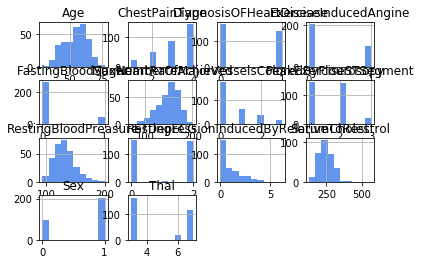

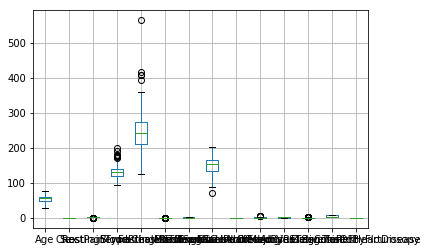

Correlation between variables.
______________________________


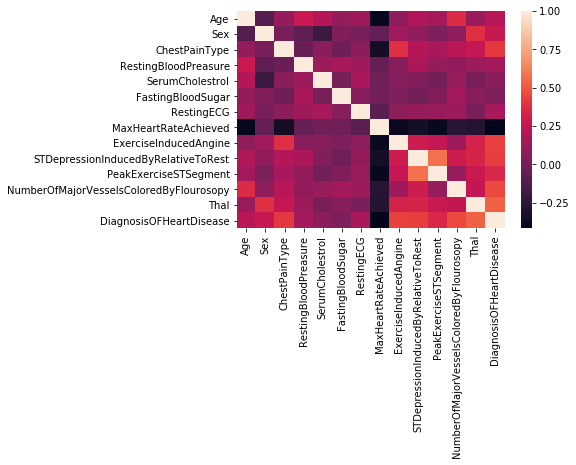

Dispersion.
___________


C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


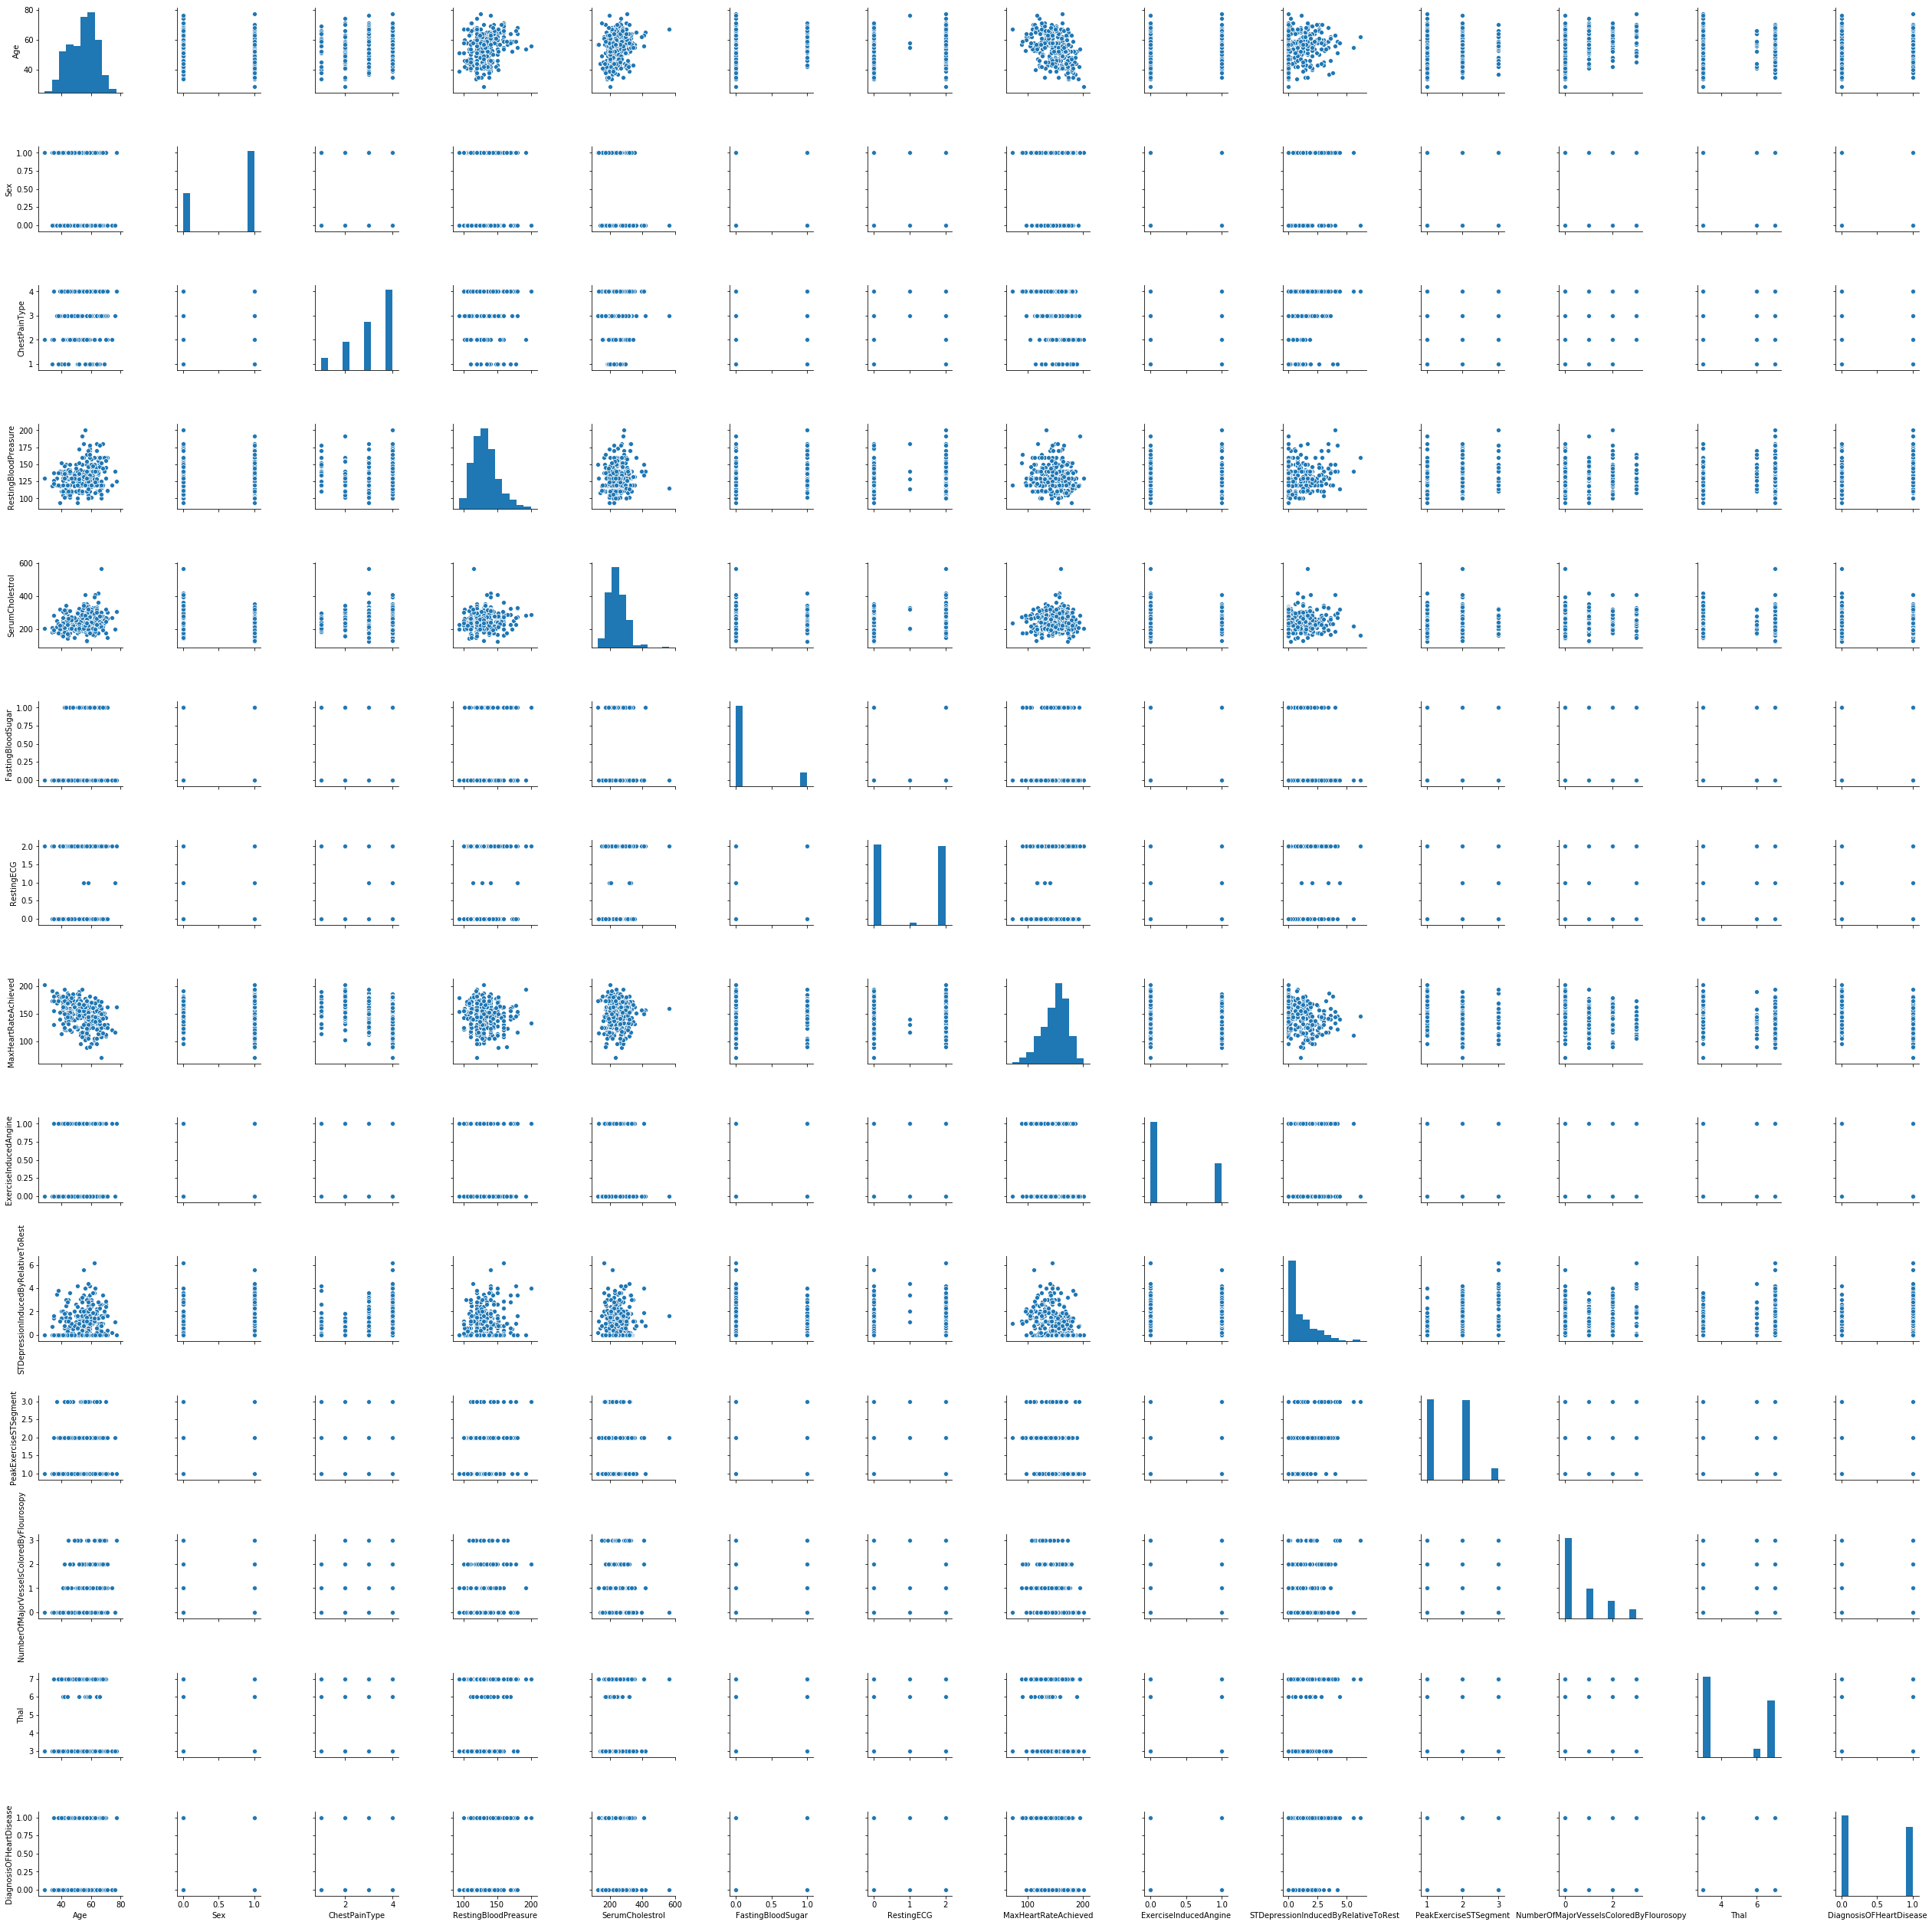

In [6]:
# Preprocessing.

class DataPreprocessing:
    
    def isThereMissingValues(dataset):
        missingValues = dataset.isna().sum()
        sumOfMissingValues = missingValues.sum()
        print("Missing Values:", missingValues)
        print("Sum of Missing Values:", sumOfMissingValues)
        
    def histogramList(dataset):
        Histogram = dataset.hist(color = 'cornflowerblue')
        
    def boxPlotList(dataset):
        boxPlot = dataset.boxplot()
        
    def correlationList(dataset):
        correlationBetweenFeatures = dataset.corr()
        correlationPlot = sns.heatmap(correlationBetweenFeatures)
        
    def scatterPlotList(dataset):
        scatterPlot = sns.pairplot(dataset)

print("Missing Values.")
print("_______________")
DataPreprocessing.isThereMissingValues(dataset)
DataWithNaNValues = dataset[dataset.isna().any(axis=1)]
DataWithNaNValues

print("Distribution.")
print("_____________")
DataPreprocessing.histogramList(dataset)
plt.show()
DataPreprocessing.boxPlotList(dataset)
plt.show()

print("Correlation between variables.")
print("______________________________")
DataPreprocessing.correlationList(dataset)
plt.show()

print("Dispersion.")
print("___________")
DataPreprocessing.scatterPlotList(dataset)
plt.show()

In [10]:
# Modelling

dataset = dataset.dropna()

target = dataset.iloc[:, -1].values
features = dataset.iloc[:, :-1].values

class Models:
    
    testSize = 0.2
    featuresTrain, featuresTest, targetTrain, targetTest = train_test_split(
        features, target, test_size = testSize, random_state=42)
    
    def decisionTreeModel():
        decisionTree = DecisionTreeClassifier()
        decisionTree.fit(Models.featuresTrain, Models.targetTrain)
        return decisionTree
    
    def logisticRegressionModel():
        logisticRegressionClassifier = LogisticRegression()
        logisticRegressionClassifier.fit(Models.featuresTrain, Models.targetTrain)   
        return logisticRegressionClassifier
    
    def randomForestModel():
        randomForest = RandomForestClassifier()
        randomForest.fit(Models.featuresTrain, Models.targetTrain)
        return randomForest

class Metrics(Models):
    
    def decisionTreeScores():
        decisionTreeScoresTestSet = cross_val_score(
            Models.decisionTreeModel(), Models.featuresTest, Models.targetTest, cv=10)
        decisionTreeScoresTrainSet = cross_val_score(
            Models.decisionTreeModel(), Models.featuresTrain, Models.targetTrain, cv=10)
        print("Accuracy of the test set using a Decision Tree Classifier: %0.2f (+/- %0.2f)" % (
            decisionTreeScoresTestSet.mean(), decisionTreeScoresTestSet.std() * 2))
        print("Accuracy of the train set using a Decision Tree Classifier: %0.2f (+/- %0.2f)" % (
            decisionTreeScoresTrainSet.mean(), decisionTreeScoresTrainSet.std() * 2))
        
    def logisticRegressionScores():
        logisticRegressionScoresTestSet = cross_val_score(
            Models.logisticRegressionModel(), Models.featuresTest, Models.targetTest, cv=10)
        logisticRegressionScoresTrainSet = cross_val_score(
            Models.logisticRegressionModel(), Models.featuresTrain, Models.targetTrain, cv=10)
        print("Accuracy of the test set using a Logistic Regression Classifier: %0.2f (+/- %0.2f)" % (
            logisticRegressionScoresTestSet.mean(), logisticRegressionScoresTestSet.std() * 2))
        print("Accuracy of the train set using a Logistic Regression Classifier: %0.2f (+/- %0.2f)" % (
            logisticRegressionScoresTrainSet.mean(), logisticRegressionScoresTrainSet.std() * 2))
        
    def randomForestScores():
        randomForestScoresTestSet = cross_val_score(
            Models.randomForestModel(), Models.featuresTest, Models.targetTest, cv=10)
        randomForestScoresTrainSet = cross_val_score(
            Models.randomForestModel(), Models.featuresTrain, Models.targetTrain, cv=10)
        print("Accuracy of the test set using a Random Forest Classifier: %0.2f (+/- %0.2f)" % (
            randomForestScoresTestSet.mean(), randomForestScoresTestSet.std() * 2))
        print("Accuracy of the train set using a Random Forest Classifier: %0.2f (+/- %0.2f)" % (
            randomForestScoresTrainSet.mean(), randomForestScoresTrainSet.std() * 2))

Metrics.decisionTreeScores()
Metrics.logisticRegressionScores()
Metrics.randomForestScores()

Accuracy of the test set using a Decision Tree Classifier: 0.77 (+/- 0.44)
Accuracy of the train set using a Decision Tree Classifier: 0.73 (+/- 0.14)
Accuracy of the test set using a Logistic Regression Classifier: 0.90 (+/- 0.27)
Accuracy of the train set using a Logistic Regression Classifier: 0.82 (+/- 0.13)
Accuracy of the test set using a Random Forest Classifier: 0.84 (+/- 0.34)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t


Accuracy of the train set using a Random Forest Classifier: 0.79 (+/- 0.13)


In [9]:
class ModelsTunned:
    
    dataset = dataset.dropna()

    target = dataset.iloc[:, -1].values
    features = dataset.iloc[:, :-1].values
    
    testSize = 0.2
    featuresTrain, featuresTest, targetTrain, targetTest = train_test_split(features, target, test_size = testSize, random_state=42)
    
    def decisionTreeModelTunned():
        decisionTreeTunned = DecisionTreeClassifier(criterion = 'gini', splitter = 'random')
        decisionTreeTunned.fit(ModelsTunned.featuresTrain, ModelsTunned.targetTrain)
        return decisionTreeTunned
    
class MetricsTunned(ModelsTunned):
    
    def decisionTreeTunnedScores():
        decisionTreeTunnedScoresTestSet = cross_val_score(
            ModelsTunned.decisionTreeModelTunned(), ModelsTunned.featuresTest, ModelsTunned.targetTest, cv=10)
        decisionTreeTunnedScoresTrainSet = cross_val_score(
            ModelsTunned.decisionTreeModelTunned(), ModelsTunned.featuresTrain, ModelsTunned.targetTrain, cv=10)
        print("Accuracy of the test set using a Decision Tree Classifier: %0.2f (+/- %0.2f)" % (
            decisionTreeTunnedScoresTestSet.mean(), decisionTreeTunnedScoresTestSet.std() * 2))
        print("Accuracy of the train set using a Decision Tree Classifier: %0.2f (+/- %0.2f)" % (
            decisionTreeTunnedScoresTrainSet.mean(), decisionTreeTunnedScoresTrainSet.std() * 2))
        
MetricsTunned.decisionTreeTunnedScores()

Accuracy of the test set using a Decision Tree Classifier: 0.75 (+/- 0.39)
Accuracy of the train set using a Decision Tree Classifier: 0.70 (+/- 0.22)
